In [5]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 487.6 kB/s eta 0:04:17
   ---------------------------------------- 0.2/124.9 MB 1.9 MB/s eta 0:01:07
   ---------------------------------------- 0.6/124.9 MB 3.6 MB/s eta 0:00:35
   ---------------------------------------- 1.0/124.9 MB 4.8 MB/s eta 0:00:26
   ---------------------------------------- 1.4/124.9 MB 5.7 MB/s eta 0:00:22
    --------------------------------------- 2.0/124.9 MB 6.6 MB/s eta 0:00:19
    --------------------------------------- 2.6/124.9 MB 7.5 MB/s eta 0:00:17
   - -------------------------------------- 3.3/124.9 MB 8.3 MB/s eta 0:00:15
   - -------------------------------------- 4.1/124.9 MB 9.4 MB/s eta 0:00:13
   - -------------------------------------- 5.0/124.9 MB 10.3 MB/s eta 0:00:12
   - -------------------------------------- 6.0/124.9 MB 11.3 MB/s eta 0:00

         Unique_ID         Sales     Quantity     Discount    Mrkup Pct  \
count  3312.000000   3312.000000  3312.000000  3312.000000  3312.000000   
mean   1656.500000    221.381418     3.766908     0.156467     0.057077   
std     956.236372    585.257531     2.221776     0.207429     0.046179   
min       1.000000      0.444000     1.000000     0.000000     0.010000   
25%     828.750000     17.018000     2.000000     0.000000     0.020000   
50%    1656.500000     53.810000     3.000000     0.200000     0.030000   
75%    2484.250000    205.105700     5.000000     0.200000     0.090000   
max    3312.000000  13999.960000    14.000000     0.800000     0.160000   

        Earned Pct  Commission Pct   Commission  Commission Rate  \
count  3312.000000     3312.000000  3312.000000      3312.000000   
mean      2.057077        0.068252    19.973034         0.068252   
std       0.046179        0.055562    73.344540         0.055562   
min       2.010000        0.010000     0.020000     

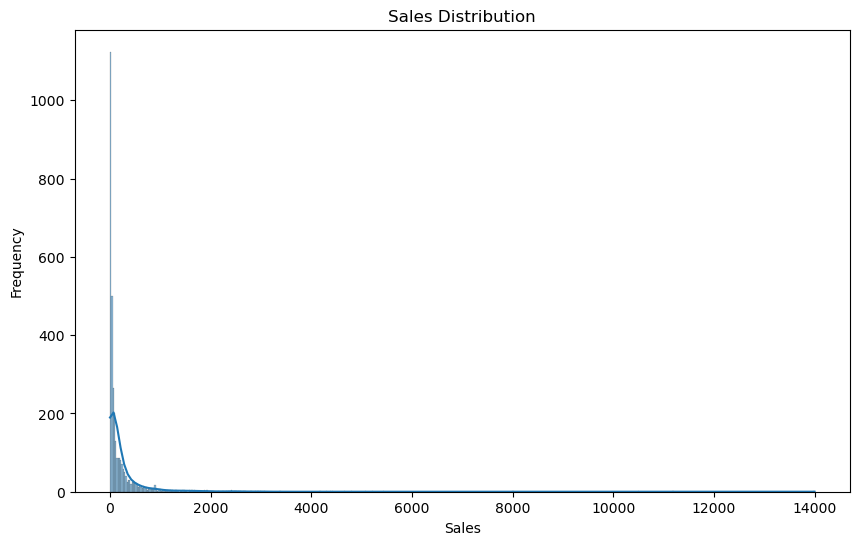

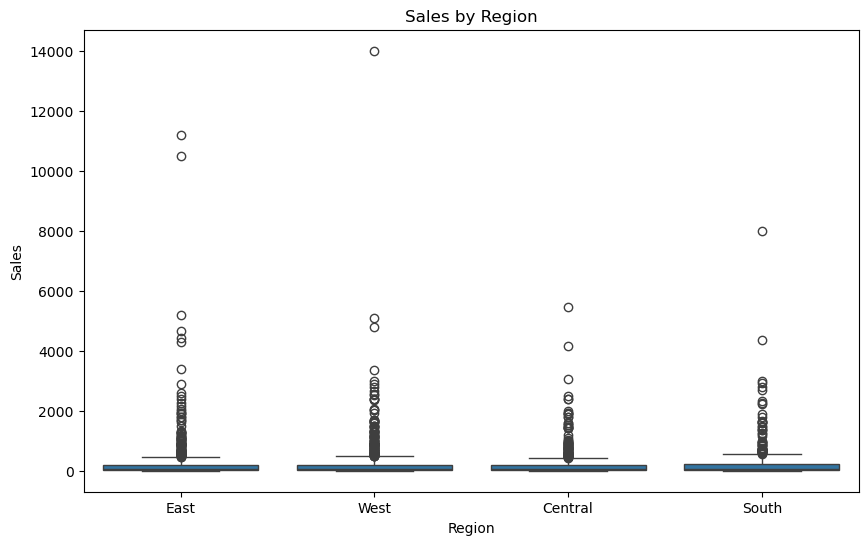

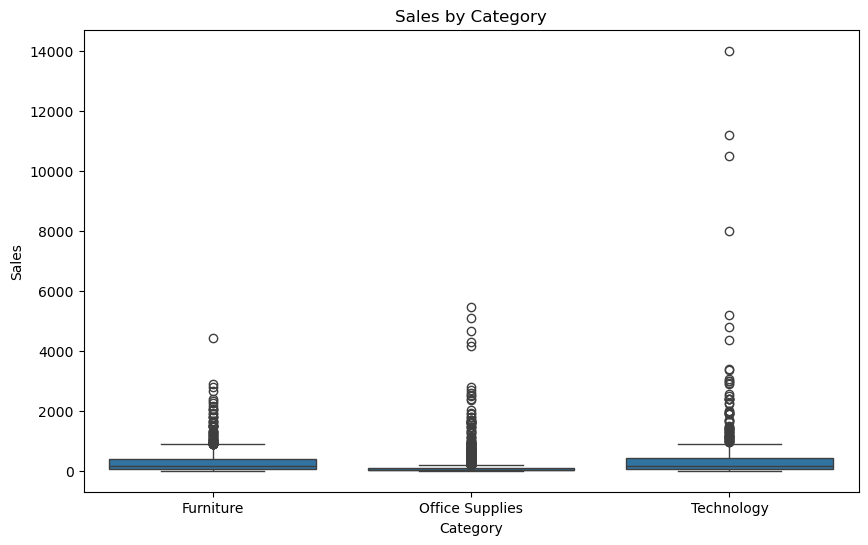

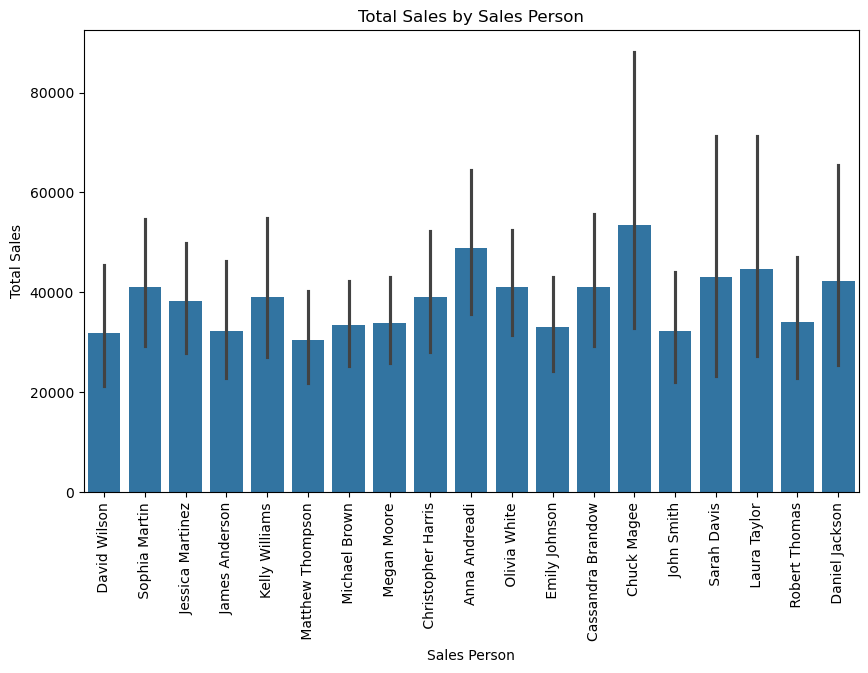

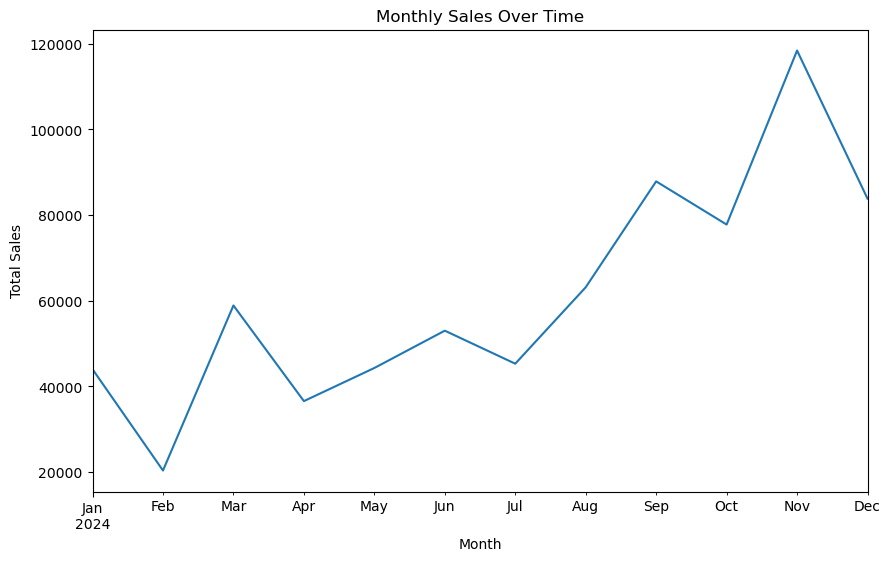

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np


# Define the file path
file_path = r'C:\Users\todd-\OneDrive\Desktop\todd\Excel Templates\Shop_Sales_DB-No VBA.csv'

# Read the CSV file into a DataFrame with the specified encoding
df = pd.read_csv(file_path, encoding='latin1')

# Display the first 10 rows of the DataFrame
df_head = df.head()

# Display basic statistics
print(df.describe())

# Plotting Sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Plotting Sales by Region
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Sales', data=df)
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

# Plotting Sales by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

# Plotting Sales by Sales Person
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales Person', y='Sales', data=df, estimator=np.sum)
plt.title('Total Sales by Sales Person')
plt.xlabel('Sales Person')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

# Plotting Sales over time
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)
df['Sales'].resample('ME').sum().plot(figsize=(10, 6))
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [11]:
import xgboost as xgb
import xgboost as xgb
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Split the data into features and target variable
X = df.drop('Sales', axis=1)
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=10)
xg_reg.fit(X_train, y_train)

NameError: name 'LabelEncoder' is not defined

In [ ]:
# Predict on the test set
y_pred = xg_reg.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [ ]:
# Plot the feature importance
xgb.plot_importance(xg_reg)
plt.show()